In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install torchviz
! pip install torchsummary
! pip install imblearn
!pip install efficientnet_pytorch
!pip install ultralytics
! pip install split-folders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
#if you dont have dataset, you can download that from kaggle
import os
import kagglehub
import shutil



# Define the paths for the new directories
datasets_folder_path = '/content/drive/My Drive/Datasets'
stress_nonstress_folder_path = os.path.join(datasets_folder_path, 'stress_nonstress')

# Create the directories
os.makedirs(stress_nonstress_folder_path, exist_ok=True)

# Download latest version
path = kagglehub.dataset_download("preritbhagat/stress-non-stress-images")

# Move the downloaded files to the 'brain tumor dataset' folder
for filename in os.listdir(path):
    shutil.move(os.path.join(path, filename), os.path.join(stress_nonstress_folder_path, filename))

print("Dataset files downloaded to:", stress_nonstress_folder_path)


100%|██████████| 573M/573M [00:11<00:00, 54.6MB/s]

Extracting files...


NameError: name 'breastcancer_folder_path' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import os
from sklearn.utils import resample
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
from torchsummary import summary
import torch.nn.functional as F
import pathlib
from torch import optim
import torchvision.models as models
from torchviz import make_dot
from torchvision import models
from torchviz import make_dot
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay , classification_report
import seaborn as sns
from efficientnet_pytorch import EfficientNet
from ultralytics import YOLO
import splitfolders




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to the main dataset directory
dataset_dir = "/content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF"

# Paths for train, test, and validation sets
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
val_dir = os.path.join(dataset_dir, "val")  # Create validation directory

# Ensure the validation directory exists
os.makedirs(val_dir, exist_ok=True)

# Function to split test data into validation
def split_test_data(test_dir, val_dir, split_ratio=0.5):
    for class_label in ['NoStress', 'Stress']:  # Assuming class folders are named '0' and '1'
        test_class_dir = os.path.join(test_dir, class_label)
        val_class_dir = os.path.join(val_dir, class_label)

        if not os.path.exists(test_class_dir):
            print(f"Warning: {test_class_dir} not found!")
            continue

        os.makedirs(val_class_dir, exist_ok=True)  # Create validation subfolders

        # Get all image files in the test class directory
        image_files = [f for f in os.listdir(test_class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg','.JPG'))]

        # Split images into validation and remaining test sets
        val_files, remaining_test_files = train_test_split(image_files, test_size=split_ratio, random_state=42)

        # Move validation images to the new validation directory
        for file in val_files:
            src_path = os.path.join(test_class_dir, file)
            dest_path = os.path.join(val_class_dir, file)
            shutil.move(src_path, dest_path)

# Perform the test-to-validation split
split_test_data(test_dir, val_dir)

# Function to create a DataFrame with image paths and labels
def create_dataframe(main_directory, dataset_type):
    data = []
    dataset_path = os.path.join(main_directory, dataset_type)  # e.g., "/content/.../train"

    if not os.path.exists(dataset_path):
        print(f"Warning: {dataset_path} not found!")
        return pd.DataFrame(columns=['file_path', 'label'])  # Return empty DataFrame if not found

    for class_label in ['NoStress', 'Stress']:  # Assuming class folders are named '0' and '1'
        class_dir = os.path.join(dataset_path, class_label)

        if os.path.isdir(class_dir):  # Ensure it's a directory
            for file in os.listdir(class_dir):
                if file.lower().endswith(('.png', '.jpg', '.jpeg','.JPG')):  # Include only image files
                    data.append({
                        'file_path': os.path.join(class_dir, file),
                        'label': (class_label)
                    })

    return pd.DataFrame(data)

# Create DataFrames for train, validation, and test sets
train_df = create_dataframe(dataset_dir, "train")
valid_df = create_dataframe(dataset_dir, "val")
test_df = create_dataframe(dataset_dir, "test")

# Print the first few rows of each DataFrame
print("Train DataFrame:\n", train_df.head())
print("\nValidation DataFrame:\n", valid_df.head())
print("\nTest DataFrame:\n", test_df.head())

# Print dataset sizes
print(f"\nDataset sizes - Train: {len(train_df)}, Validation: {len(valid_df)}, Test: {len(test_df)}")


Train DataFrame:
                                            file_path     label
0  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
1  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
2  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
3  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
4  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress

Validation DataFrame:
                                            file_path     label
0  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
1  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
2  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
3  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
4  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress

Test DataFrame:
                                            file_path     label
0  /content/drive/MyDrive/Datasets/stress_nonstre...  NoStress
1  /content/drive/MyDrive/Datasets/stress_nonstre...  NoSt

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  4409 non-null   object
 1   label      4409 non-null   object
dtypes: object(2)
memory usage: 69.0+ KB


In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  1772 non-null   object
 1   label      1772 non-null   object
dtypes: object(2)
memory usage: 27.8+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  119 non-null    object
 1   label      119 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [ ]:
train_df.describe()

file_path   label
count                                                4409    4409
unique                                               4409       2
top     /content/drive/MyDrive/Datasets/stress_nonstre...  Stress
freq                                                    1    2449

In [ ]:
valid_df.describe()

file_path   label
count                                                1772    1772
unique                                               1772       2
top     /content/drive/MyDrive/Datasets/stress_nonstre...  Stress
freq                                                    1     983

In [ ]:
test_df.describe()

file_path   label
count                                                 119     119
unique                                                119       2
top     /content/drive/MyDrive/Datasets/stress_nonstre...  Stress
freq                                                    1      66

In [ ]:
traindf_label_value_counts = train_df['label'].value_counts()
validdf_label_value_counts = valid_df['label'].value_counts()
testdf_label_value_counts = test_df['label'].value_counts()

In [ ]:
print("distribution of train data")
print(traindf_label_value_counts)
print("distribution of valid data")
print(validdf_label_value_counts)
print("distribution of test data")
print(testdf_label_value_counts)

distribution of train data
label
Stress      2449
NoStress    1960
Name: count, dtype: int64
distribution of valid data
label
Stress      983
NoStress    789
Name: count, dtype: int64
distribution of test data
label
Stress      66
NoStress    53
Name: count, dtype: int64


In [ ]:
print(f'how many rows are duplicated in train dataset ? : {train_df.duplicated().sum()}')
print(f'how many rows are duplicated in valid dataset? : {valid_df.duplicated().sum()}')
print(f'how many rows are duplicated in test dataset ? : {test_df.duplicated().sum()}')


how many rows are duplicated in train dataset ? : 0
how many rows are duplicated in valid dataset? : 0
how many rows are duplicated in test dataset ? : 0


In [ ]:
classes_names = train_df['label'].unique()
print(f'classes names in dataset : {classes_names}')


classes names in dataset : ['NoStress' 'Stress']


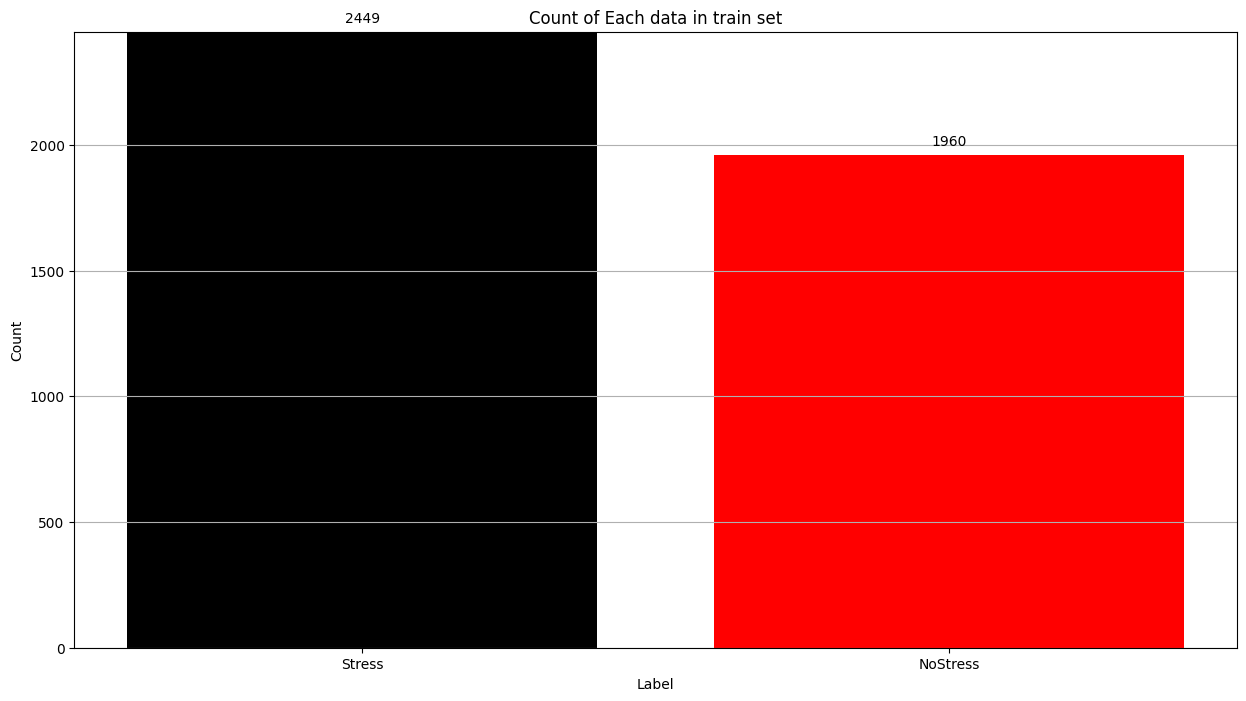

In [ ]:
# Define a color for each label
colors = {
    "NoStress": 'red',
    "Stress": 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(traindf_label_value_counts.index, traindf_label_value_counts.values, color=[colors[label] for label in traindf_label_value_counts.index])

# Set y-axis limit
plt.ylim(0, traindf_label_value_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in train set')
plt.grid(axis='y')
plt.show()


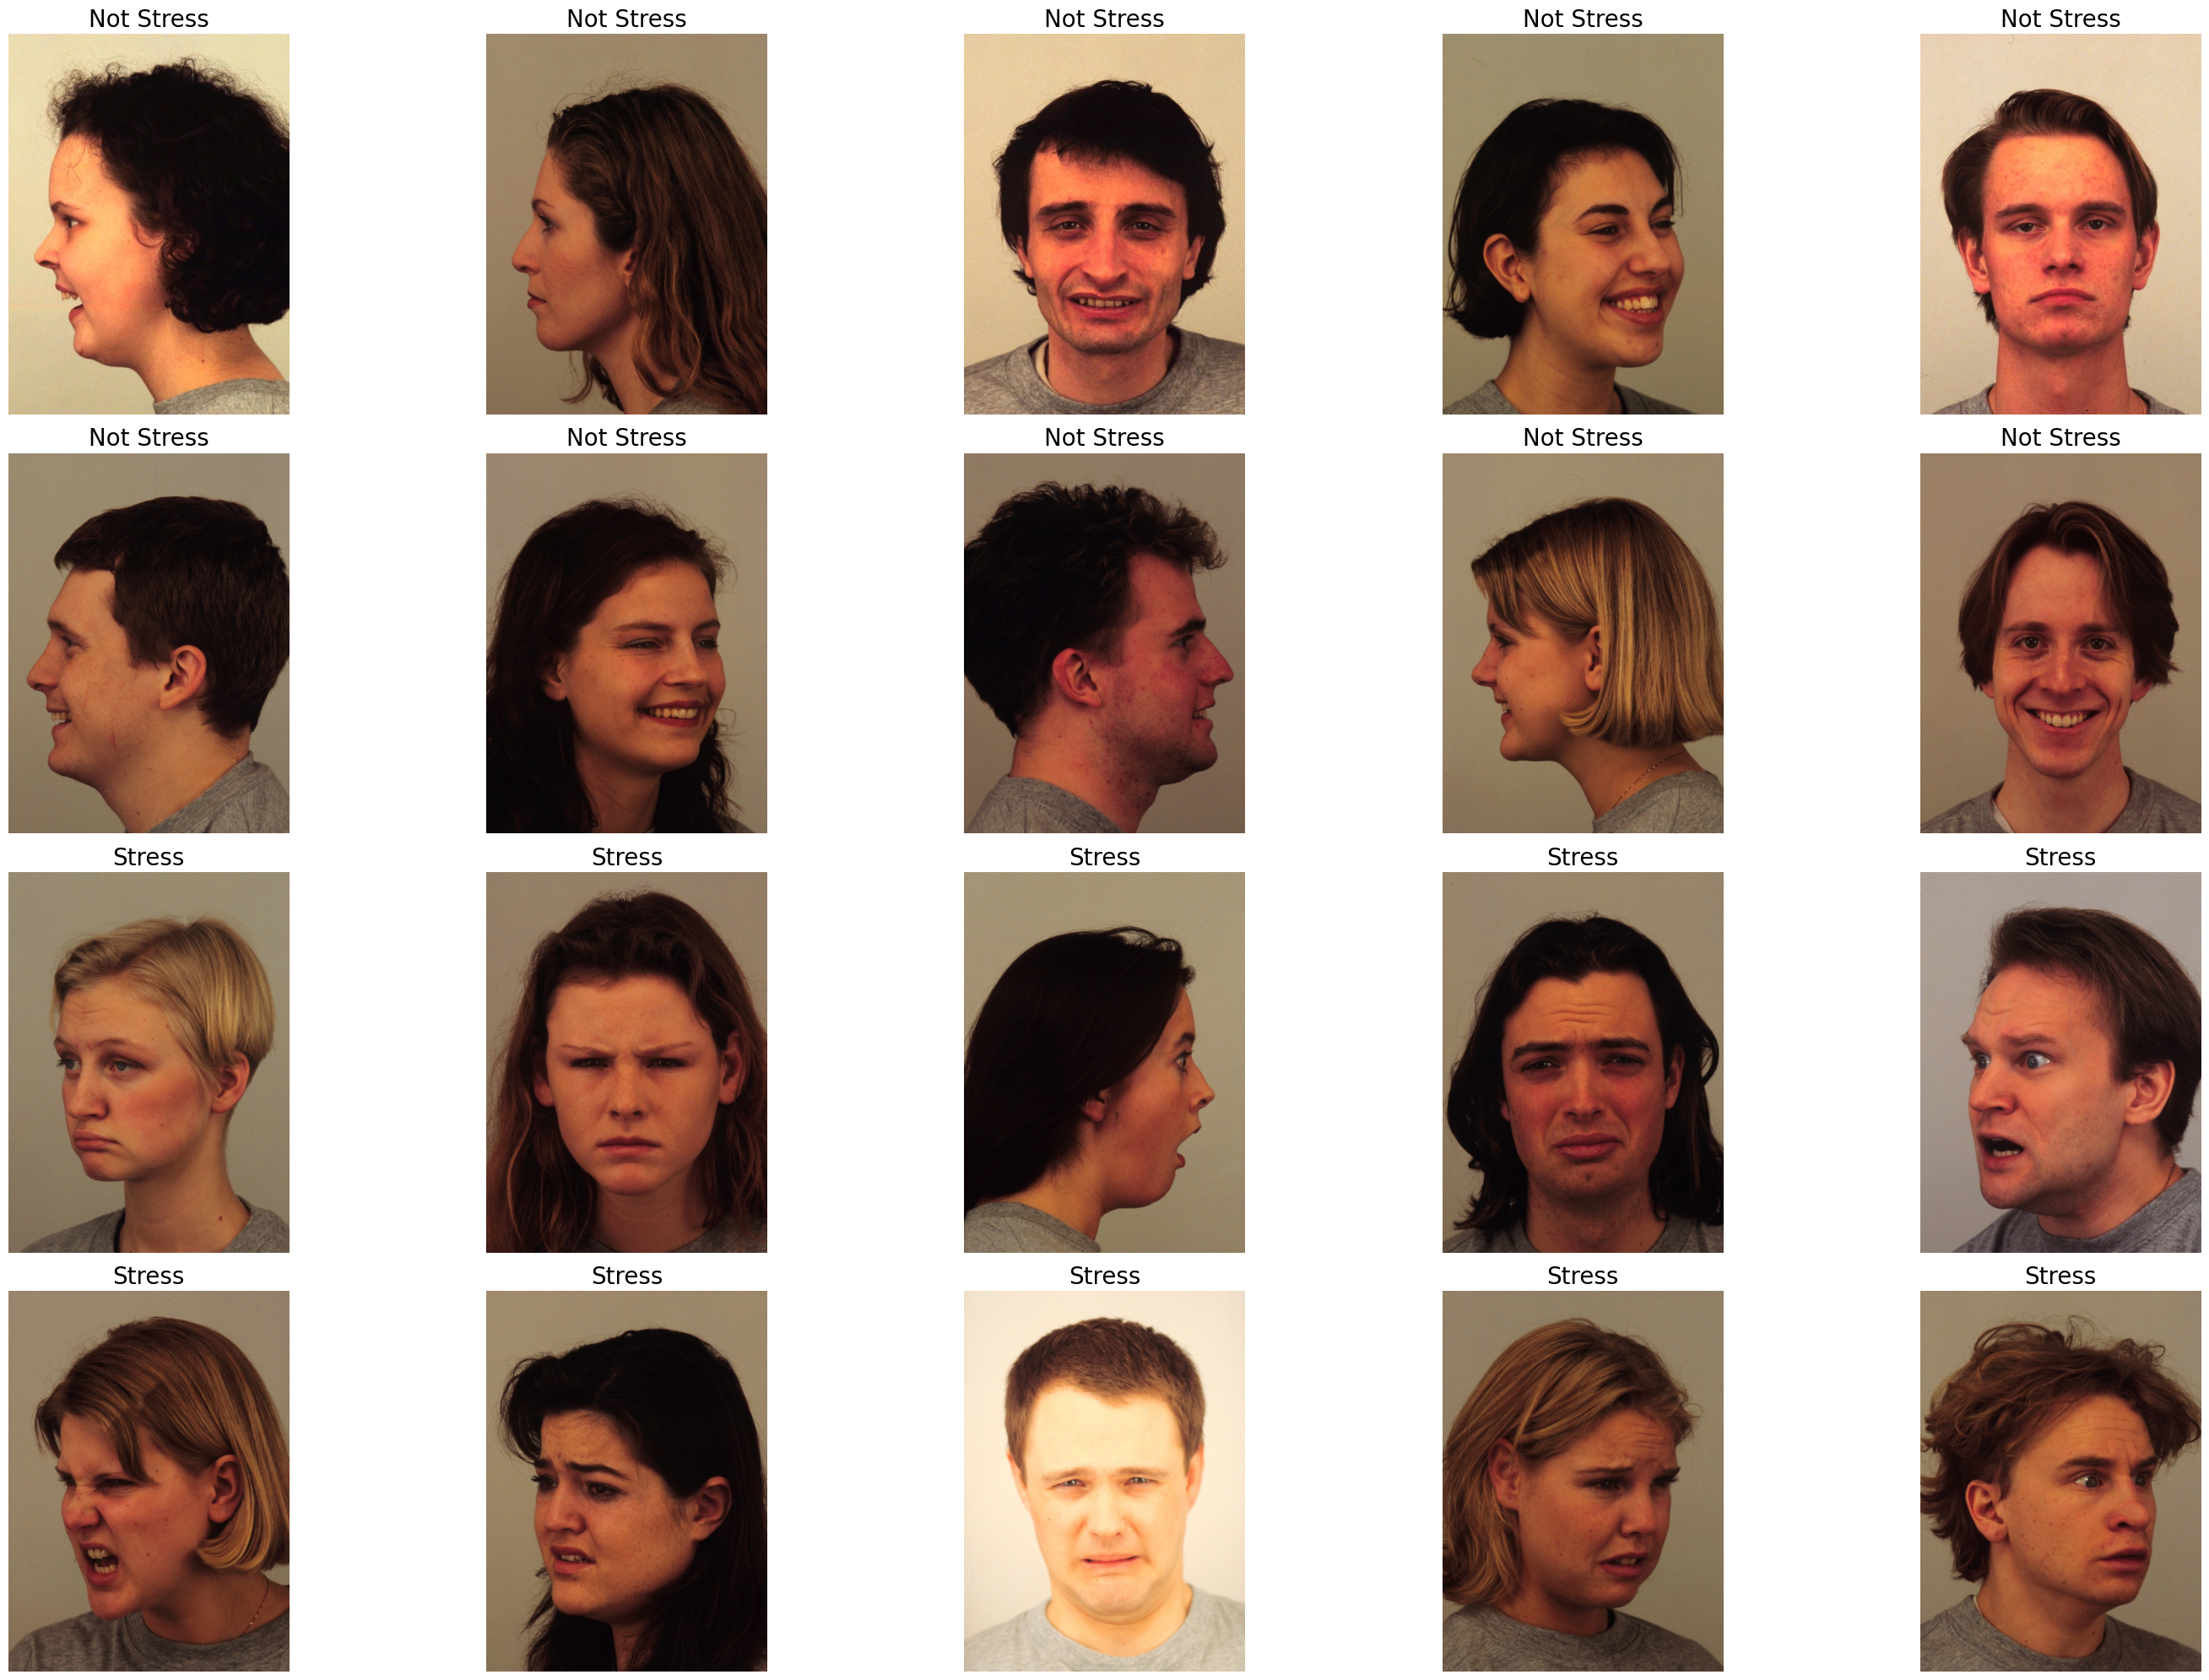

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Separate images by class
not_stress = train_df[train_df['label'] == "NoStress"]['file_path'].values
stress = train_df[train_df['label'] == "Stress"]['file_path'].values

# Randomly sample 10 images from each category
not_stress_sample = np.random.choice(not_stress, min(10, len(not_stress)), replace=False)
stress_sample = np.random.choice(stress, min(10, len(stress)), replace=False)

# Create subplots: 4 rows and 5 columns
fig, axes = plt.subplots(4, 5, figsize=(30, 20))

# Function to display images
def display_image(ax, img_path, title):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')  # Display in grayscale
    ax.axis('off')
    ax.set_title(title, fontsize=20)

# Distribute images across 4 rows
for i in range(5):  # First 5 "not stress" images
    display_image(axes[0, i], not_stress_sample[i], "Not Stress")

for i in range(5, 10):  # Next 5 "not stress" images
    display_image(axes[1, i - 5], not_stress_sample[i], "Not Stress")

for i in range(5):  # First 5 "stress" images
    display_image(axes[2, i], stress_sample[i], "Stress")

for i in range(5, 10):  # Next 5 "stress" images
    display_image(axes[3, i - 5], stress_sample[i], "Stress")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#handle class imbalance by oversampling

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes correctly
df_majority = train_df[train_df['label'] == "Stress"]  # Majority class
df_minority = train_df[train_df['label'] == "NoStress"]  # Minority class

# Oversample minority class (NoStress) to match the majority class (Stress)
df_minority_oversampled = resample(df_minority,
                                   replace=True,  # Enable oversampling
                                   n_samples=len(df_majority),  # Match the majority class
                                   random_state=42)  # For reproducibility

# Combine the oversampled minority class with the majority class
train_df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset to mix the samples
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print new class distribution
print("New class distribution after oversampling:")
print(train_df_balanced['label'].value_counts())




New class distribution after oversampling:
label
NoStress    2449
Stress      2449
Name: count, dtype: int64


In [ ]:
traindf_value_counts = train_df_balanced["label"].value_counts()

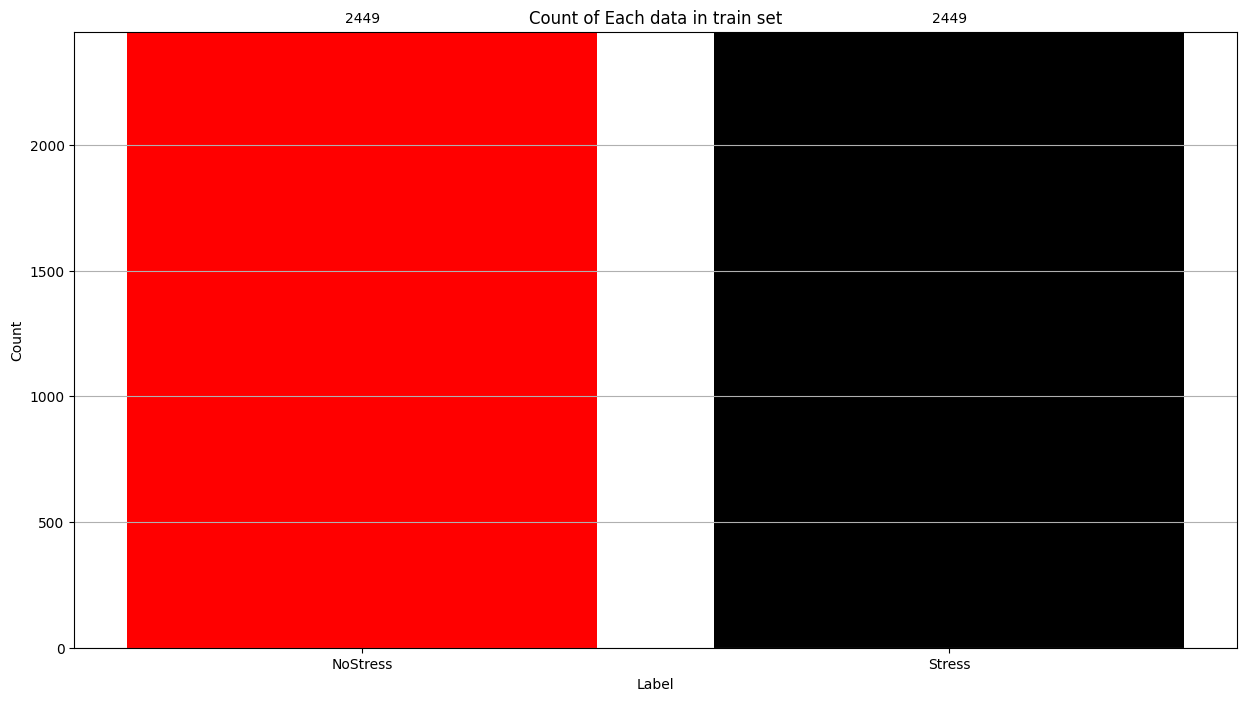

In [ ]:
# Define a color for each label
colors = {
    "NoStress": 'red',
    "Stress": 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(traindf_value_counts.index, traindf_value_counts.values, color=[colors[label] for label in traindf_value_counts.index])

# Set y-axis limit
plt.ylim(0, traindf_value_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in train set')
plt.grid(axis='y')
plt.show()


#preparing data

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image, ImageFile
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# ✅ Handle corrupted images gracefully
ImageFile.LOAD_TRUNCATED_IMAGES = True

# ✅ **Apply Label Encoding to Convert Categorical Labels into Numeric Form**
label_encoder = LabelEncoder()

# Apply encoding to labels in DataFrame
train_df['label'] = label_encoder.fit_transform(train_df['label'])
valid_df['label'] = label_encoder.transform(valid_df['label'])
test_df['label'] = label_encoder.transform(test_df['label'])

# ✅ **Optimized Data Augmentation for Training**
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), scale=(0.9, 1.1)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ **Minimal Transformations for Validation & Test Data**
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ **Custom Dataset Class with Improved Error Handling**
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]  # The label should already be encoded

        # Check if the image file exists
        if not os.path.isfile(img_path):
            print(f"⚠ Warning: Missing file {img_path}")
            return None

        try:
            img = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"❌ Error loading image {img_path}: {e}")
            return None

        if self.transform:
            img = self.transform(img)

        # Ensure label is a tensor and is of the correct type (long integer)
        return img, torch.tensor(label, dtype=torch.long)  # Ensure label is numeric

# ✅ **Create Datasets**
train_dataset = CustomDataset(train_df, transform=train_transform)  # Ensure train_df is defined
valid_dataset = CustomDataset(valid_df, transform=test_transform)
test_dataset = CustomDataset(test_df, transform=test_transform)

# ✅ **Optimized DataLoaders for Performance**
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

# ✅ **Dataset Summary**
print(f"✅ Training dataset size: {len(train_loader.dataset)}")
print(f"✅ Validation dataset size: {len(val_loader.dataset)}")
print(f"✅ Test dataset size: {len(test_loader.dataset)}")

# ✅ **Show Class Encoding**
print("\nLabel Encoding Mapping:")
for class_name, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"  {class_name} → {encoded_value}")


✅ Training dataset size: 4409
✅ Validation dataset size: 1772
✅ Test dataset size: 119

Label Encoding Mapping:
  0 → 0
  1 → 1


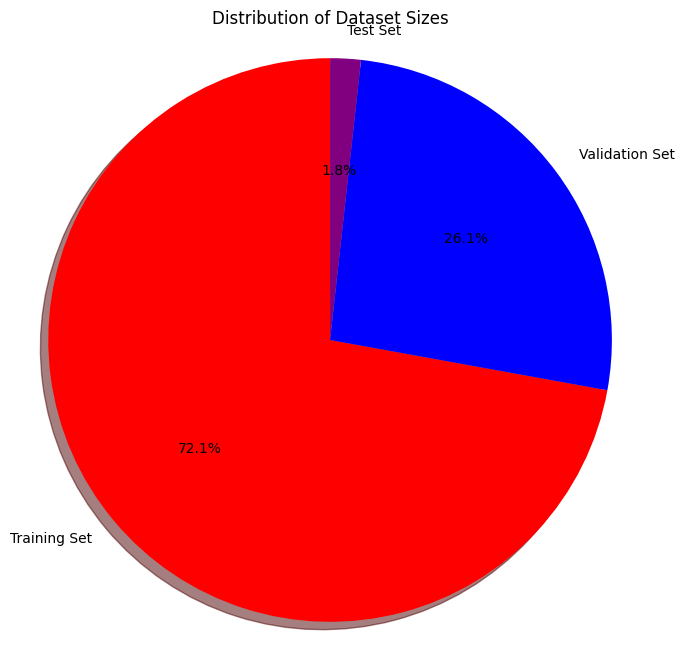

In [ ]:
# Function to create a pie chart for the dataset sizes
def plot_pie_chart(sizes, labels, title):
    plt.figure(figsize=(8, 8))
    plt.pie(sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            colors=colors)  # Use the specified colors
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

# Get the sizes of each dataset
train_size = len(train_loader.dataset)
val_size = len(val_loader.dataset)
test_size = len(test_loader.dataset)

# Create a list of sizes and corresponding labels
sizes = [train_size, val_size, test_size]
labels = ['Training Set', 'Validation Set', 'Test Set']
colors = ['red', 'blue', 'purple']  # Specify colors for each dataset



# Plot the pie chart for the dataset sizes
plot_pie_chart(sizes, labels, 'Distribution of Dataset Sizes')


In [ ]:
img, label = train_dataset[300]
plt.imshow(img.permute(1,2,0)) #convert into bgr format
print(label)

ValueError: invalid literal for int() with base 10: 'Stress'

In [ ]:
print(f'how many batch do we have in train loader? :{len(train_loader)}')
print(f'how many batch do we have in validation loader? :{len(val_loader)}')
print(f'how many batch do we have in test loader? :{len(test_loader)}')


#Modeling

In [ ]:

class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()

        # ✅ More Convolutional Layers with Increased Filters
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)

        # ✅ Max Pooling Layer
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        # ✅ Global Average Pooling (Keeps the spatial size but reduces depth)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))  # Converts 2048x7x7 → 2048x1x1

        # ✅ Fully Connected Layers (Increased Size)
        self.fc1 = nn.Linear(512, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)  # Binary classification output

        # ✅ Advanced Activation Functions
        self.relu = nn.ReLU()  # ReLU activation for non-linearity
        self.leakyRelu = nn.LeakyReLU(negative_slope=0.01)  # LeakyReLU

        # ✅ Dropout (Added more dropout layers for regularization)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # ✅ Convolutional Layers with Batch Normalization and Max Pooling
        x = self.leakyRelu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn4(self.conv4(x)))
        x = self.maxpool(x)


        # ✅ Global Average Pooling
        x = self.gap(x)  # Shape: (batch_size, 2048, 1, 1)
        x = x.view(x.size(0), -1)  # Flatten → (batch_size, 2048)

        # ✅ Fully Connected Layers with Dropout
        x = self.leakyRelu(self.fc1(x))
        x = self.dropout(x)

        x = self.leakyRelu(self.fc2(x))
        x = self.dropout(x)


        x = self.fc3(x)  # No sigmoid here (handled in BCEWithLogitsLoss)
        return x  # Raw logits (for BCEWithLogitsLoss)


In [ ]:
Model1 = ComplexCNN()

In [ ]:

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


CUDA is available!
Current CUDA device: 0
Number of available GPUs: 1
GPU 0: Tesla T4


In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
Model1.to(device)

# Create a dummy input tensor on the same device
input_tensor = torch.randn(1, 3, 224, 224).to(device)

# Print model summary
summary(Model1, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
         LeakyReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
       BatchNorm2d-6        [-1, 128, 112, 112]             256
         LeakyReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
      BatchNorm2d-10          [-1, 256, 56, 56]             512
        LeakyReLU-11          [-1, 256, 56, 56]               0
        MaxPool2d-12          [-1, 256, 28, 28]               0
           Conv2d-13          [-1, 512, 28, 28]       1,180,160
      BatchNorm2d-14          [-1, 512,

In [ ]:

# Create a dummy input
x = torch.randn(1, 3, 224, 224).to(device)  # Batch size of 1

# Get the output
y = Model1(x)

# Visualize the model
dot = make_dot(y, params=dict(list(Model1.named_parameters())))
dot.render("CNN_Stess_noStress", format="png")  # Save as PNG


'CNN_Stess_noStress.png'

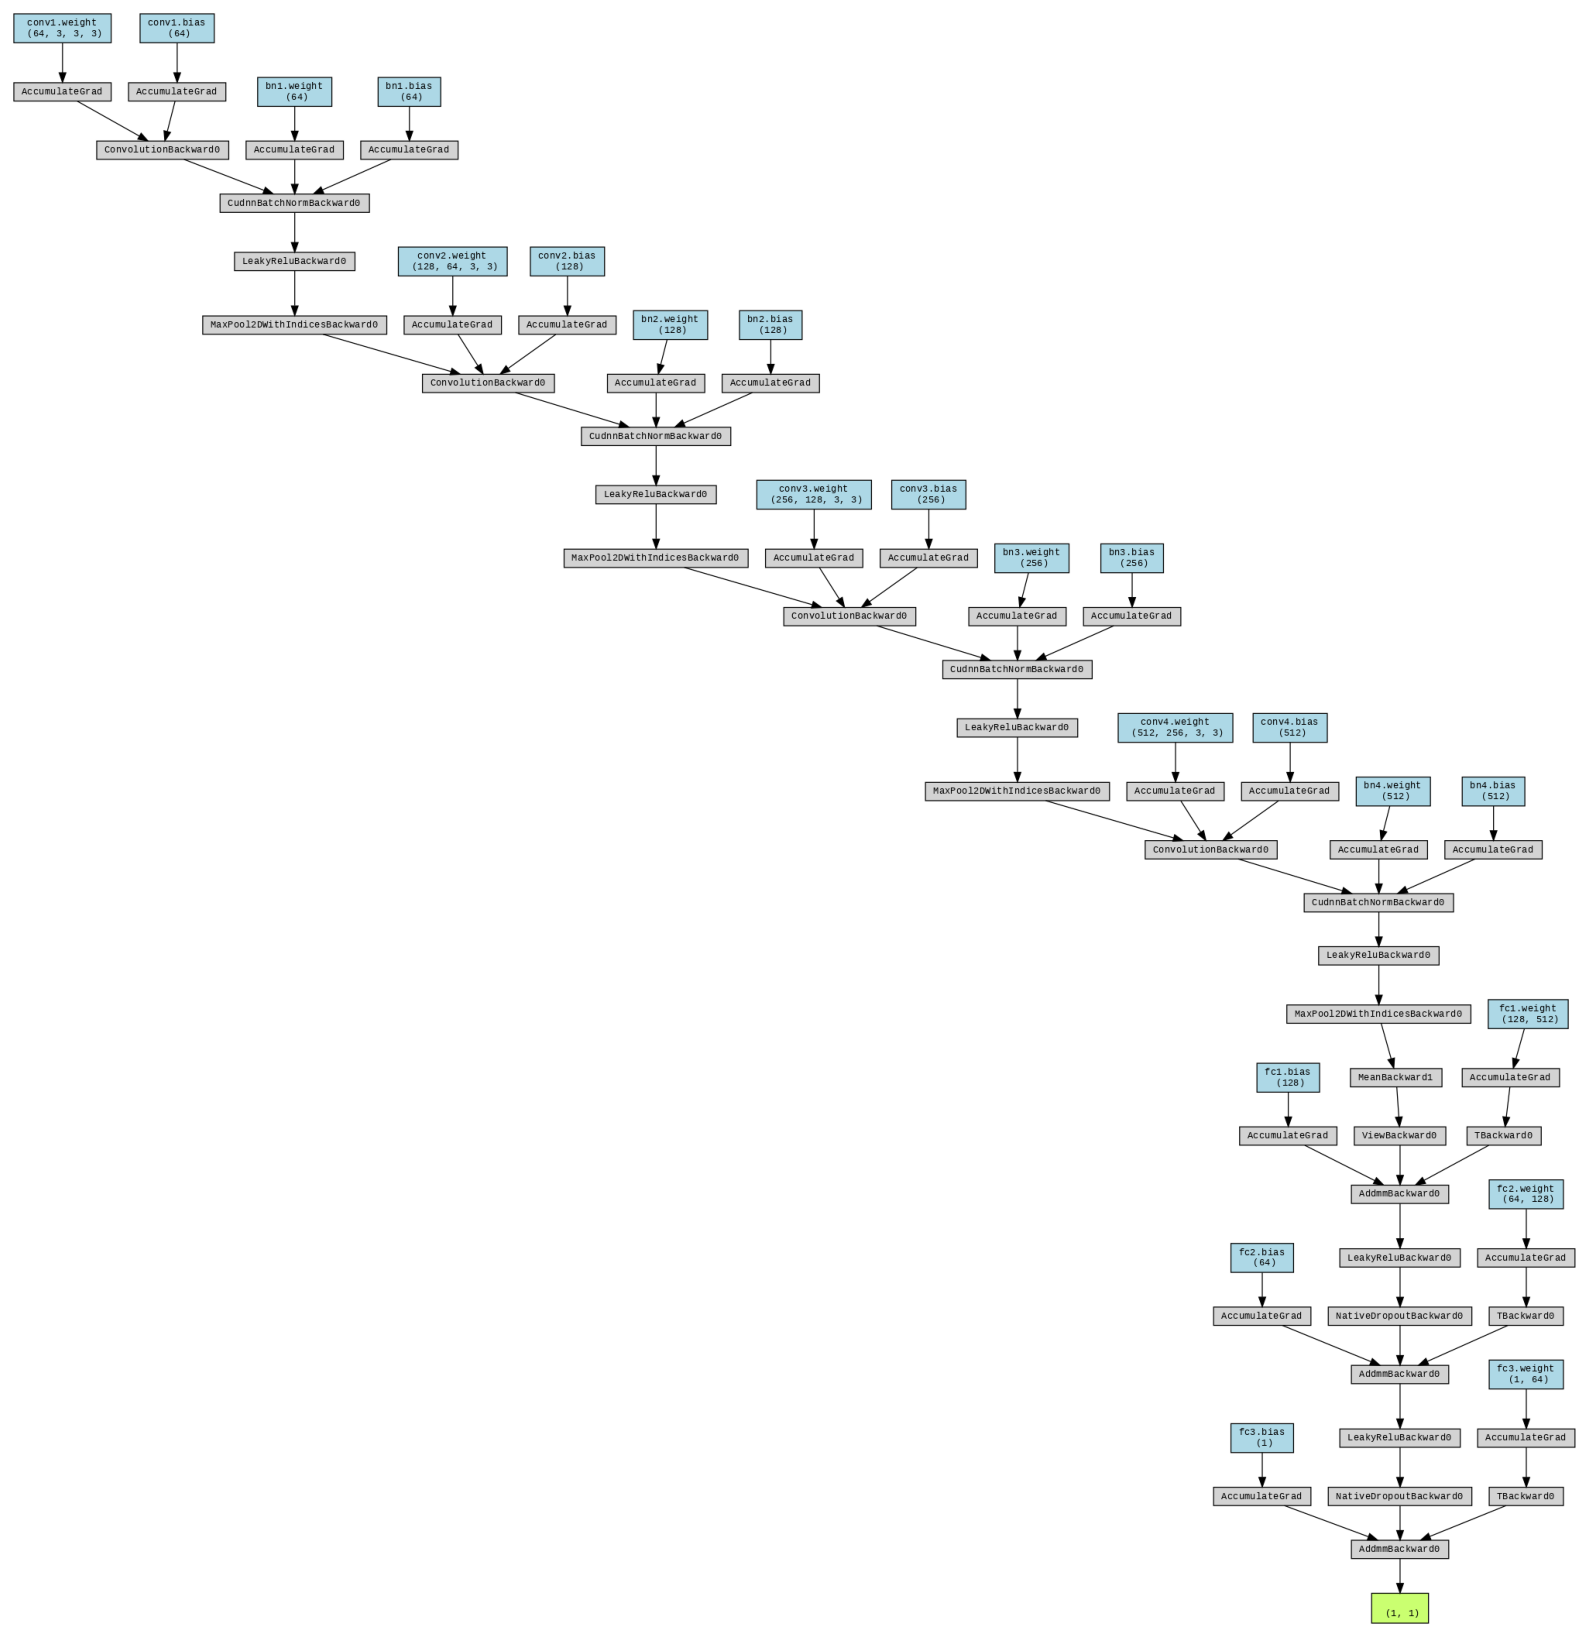

In [ ]:

# Display the image using matplotlib
img = mpimg.imread("CNN_Stess_noStress.png")
plt.figure(figsize=(35, 21))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

#Training Phase

In [ ]:

# ✅ Define Hyperparameters
num_epochs = 30
lr = 0.01  # Lower learning rate for stable convergence
weight_decay = 5e-5  # Reduced L2 regularization to prevent excessive weight decay

# ✅ Define Loss Function (No Sigmoid Needed in Model)
loss_fn = nn.BCEWithLogitsLoss()

# ✅ Define Optimizer (Adam with Weight Decay)
optimizer = optim.Adam(Model1.parameters(), lr=lr, weight_decay=weight_decay)

# ✅ Define Learning Rate Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.6, patience=2, verbose=True)


In [ ]:
# Updated Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0):
        self.patience = patience  # How many epochs to wait before stopping
        self.verbose = verbose  # Whether to print progress
        self.counter = 0  # Counter to track how many epochs without improvement
        self.best_loss = float('inf')  # Start with a large value for loss
        self.best_epoch = 0  # To save the epoch where the best model was found
        self.early_stop = False  # Stop flag
        self.delta = delta  # Minimum change to qualify as an improvement

    def __call__(self, val_loss, epoch, model_weights):
        # If the validation loss improves
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.best_epoch = epoch  # Save the epoch with best validation loss
            self.counter = 0  # Reset counter
            self.save_best_weights(model_weights)  # Save model weights when validation improves
        else:
            self.counter += 1  # Increment counter if no improvement
            if self.counter >= self.patience:  # Trigger early stop if no improvement in 'patience' epochs
                self.early_stop = True
                if self.verbose:
                    print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights):
        # Save the model weights when there's an improvement in validation loss
        torch.save(model_weights, 'best_model_weights.pth')
        if self.verbose:
            print("✅ Best model weights saved.")


In [ ]:
# Training loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

train_loss_list = []
val_loss_list = []
acc_list = []

# Initialize early stopping with patience and verbose mode
early_stopping = EarlyStopping(patience=10, verbose=True, delta=0.01)  # Optional: You can adjust delta


In [ ]:

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    correct_train = 0  # Correct predictions in training phase
    correct_val = 0  # Correct predictions in validation phase
    total_train = 0  # Total samples in training phase
    total_val = 0  # Total samples in validation phase

    # Training phase
    Model1.train()  # Set model to training mode
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float()  # Ensure labels are float for BCEWithLogitsLoss
        optimizer.zero_grad()  # Reset gradients

        # Forward pass
        outputs = Model1(images).squeeze()  # Remove extra dimension
        loss = loss_fn(outputs, labels)  # Compute loss
        train_loss += loss.item()

        # Calculate training accuracy
        predictions = torch.sigmoid(outputs) > 0.5  # Convert logits to binary values
        correct_train += (predictions == labels).sum().item()
        total_train += labels.size(0)

        # Backpropagation & Optimization
        loss.backward()
        optimizer.step()

    # Validation phase
    Model1.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()

            outputs = Model1(images).squeeze()
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()

            # Calculate validation accuracy
            predictions = torch.sigmoid(outputs) > 0.5  # Convert logits to binary values
            correct_val += (predictions == labels).sum().item()
            total_val += labels.size(0)

    # Step the learning rate scheduler based on validation loss
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)

    # Compute training and validation accuracies
    train_accuracy = 100 * correct_train / total_train
    val_accuracy = 100 * correct_val / total_val

    # Log metrics
    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(avg_val_loss)
    acc_list.append(val_accuracy)

    # Print metrics for the epoch
    print('-' * 100)
    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss / len(train_loader):.4f}, '
          f'Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {avg_val_loss:.4f}, '
          f'Val Accuracy: {val_accuracy:.2f}%')

    # Apply early stopping based on validation loss
    early_stopping(avg_val_loss, epoch, Model1.state_dict())

    # Check early stopping
    if early_stopping.early_stop:
        print(f"⏹ Early stopping at epoch {epoch + 1}. No improvement for {early_stopping.patience} epochs.")
        break

# Save final best model weights
print("🏆 Final best model weights saved.")


----------------------------------------------------------------------------------------------------
Epoch [1/30], Train Loss: 0.6062, Train Accuracy: 72.40%, Val Loss: 0.5165, Val Accuracy: 77.92%
✅ Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [2/30], Train Loss: 0.5503, Train Accuracy: 73.99%, Val Loss: 0.5491, Val Accuracy: 72.72%
----------------------------------------------------------------------------------------------------
Epoch [3/30], Train Loss: 0.5226, Train Accuracy: 74.32%, Val Loss: 0.4898, Val Accuracy: 77.98%
✅ Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [4/30], Train Loss: 0.5095, Train Accuracy: 74.09%, Val Loss: 0.5075, Val Accuracy: 77.92%
----------------------------------------------------------------------------------------------------
Epoch [5/30], Train Loss: 0.5020, Train Accuracy: 7

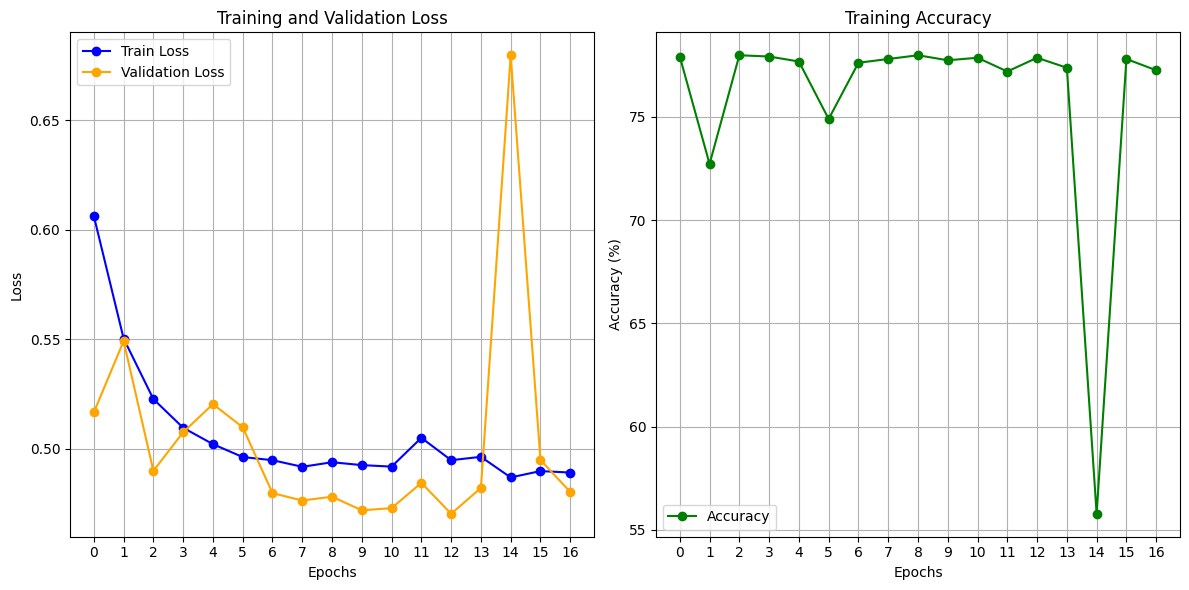

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(range(17), train_loss_list, label='Train Loss', color='blue', marker='o')
plt.plot(range(17), val_loss_list, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(17))  # Ensure all epochs are labeled
plt.grid(True)
plt.legend()
plt.tight_layout()

# Accuracy Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(17), acc_list, label='Accuracy', color='green', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(range(17))  # Ensure all epochs are labeled
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()


#Evaluation phase

In [ ]:
# Assuming you have lists to store test losses and accuracies
test_loss_list = []  # Store test losses over epochs
test_accuracy_list = []  # Store test accuracies over epochs

# Test phase
Model1.eval()  # Set model to evaluation mode
test_loss = 0
total = 0
correct = 0
all_test_labels = []
all_test_predictions = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device).float()  # Convert labels to float for BCE

        outputs = Model1(images).squeeze()  # Forward pass, remove extra dimension
        loss = loss_fn(outputs, labels)  # Compute loss for the test set
        test_loss += loss.item()

        # Convert outputs to binary predictions (0 or 1)
        predictions = torch.sigmoid(outputs) > 0.5  # Sigmoid activation for binary output
        correct += (predictions == labels).sum().item()  # Count correct predictions
        total += labels.size(0)

        # Store labels and predictions for further metrics if needed (e.g., confusion matrix)
        all_test_labels.extend(labels.cpu().numpy())
        all_test_predictions.extend(predictions.cpu().numpy())

# Calculate average test accuracy
test_accuracy = 100 * correct / float(total)
test_loss_avg = test_loss / len(test_loader)

# Store the average test loss and accuracy
test_loss_list.append(test_loss_avg)
test_accuracy_list.append(test_accuracy)

# Print final test results
print(f'Test Loss: {test_loss_avg:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.5136, Test Accuracy: 73.11%


#YOLO Models

In [ ]:


# Load YOLO model
model = YOLO("yolov8s-cls.pt")

# Train the model
model.train(
    data='/content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF',  # Correct path
    epochs=20,
    imgsz=224,
    batch=64,
    optimizer="AdamW",
    lr0=1e-3,
    weight_decay=1e-4,
    augment=True,
    patience=10
)


100%|██████████| 12.3M/12.3M [00:00<00:00, 111MB/s] 


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF, epochs=20, time=None, patience=10, batch=64, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/train... 4409 images, 0 corrupt: 100%|██████████| 4409/4409 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/val... 1772 images, 0 corrupt: 100%|██████████| 1772/1772 [10:13<00:00,  2.89it/s]


val: New cache created: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/val.cache
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0001), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      1.44G     0.7126         64        224:   6%|▌         | 4/69 [00:02<00:26,  2.42it/s]


100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

                   all      0.901          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20      1.44G     0.1068         57        224: 100%|██████████| 69/69 [01:07<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20      1.44G    0.08729         57        224: 100%|██████████| 69/69 [01:09<00:00,  1.01s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20      1.48G    0.08391         57        224: 100%|██████████| 69/69 [01:08<00:00,  1.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20      1.44G    0.07233         57        224: 100%|██████████| 69/69 [01:03<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20      1.44G    0.07757         57        224: 100%|██████████| 69/69 [01:07<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20      1.44G    0.06717         57        224: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20      1.48G    0.05923         57        224: 100%|██████████| 69/69 [01:06<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20      1.44G    0.06152         57        224: 100%|██████████| 69/69 [01:04<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20      1.44G    0.06152         57        224: 100%|██████████| 69/69 [01:10<00:00,  1.03s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20      1.44G    0.05655         57        224: 100%|██████████| 69/69 [01:07<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20      1.48G    0.05811         57        224: 100%|██████████| 69/69 [01:06<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all      0.986          1



20 epochs completed in 0.837 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 10.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
train: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/train... found 4409 images in 2 classes ✅ 
val: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/val... found 1772 images in 2 classes ✅ 
test: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/test... found 119 images in 2 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:   7%|▋         | 1/14 [00:06<01:30,  6.92s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  14%|█▍        | 2/14 [00:07<00:35,  2.93s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  21%|██▏       | 3/14 [00:11<00:41,  3.81s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  36%|███▌      | 5/14 [00:15<00:23,  2.61s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 7/14 [00:17<00:14,  2.00s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  64%|██████▍   | 9/14 [00:20<00:08,  1.70s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  79%|███████▊  | 11/14 [00:22<00:04,  1.54s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  93%|█████████▎| 13/14 [00:26<00:01,  1.64s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 14/14 [00:26<00:00,  1.89s/it]


                   all      0.986          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccb0a214250>
curves: []
curves_results: []
fitness: 0.9929458200931549
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9858916401863098, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9929458200931549}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0827003009701421, 'inference': 0.42745316270780886, 'loss': 0.00012768579659558848, 'postprocess': 0.00020720350553973262}
task: 'classify'
top1: 0.9858916401863098
top5: 1.0

In [ ]:
# Evaluate the model
results = model.val()  # This will validate the model on the validation set

# Print results
print("Results: ", results)

# Display the confusion matrix
if hasattr(results, "confusion_matrix"):
    results.confusion_matrix.plot()
else:
    print("Confusion matrix attribute not found in results.")


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
train: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/train... found 4409 images in 2 classes ✅ 
val: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/val... found 1772 images in 2 classes ✅ 
test: /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/test... found 119 images in 2 classes ✅ 


val: Scanning /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/val... 1772 images, 0 corrupt: 100%|██████████| 1772/1772 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/28 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:   4%|▎         | 1/28 [00:08<03:38,  8.10s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  11%|█         | 3/28 [00:09<01:05,  2.63s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  18%|█▊        | 5/28 [00:10<00:37,  1.61s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 7/28 [00:12<00:24,  1.18s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  32%|███▏      | 9/28 [00:13<00:18,  1.03it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  39%|███▉      | 11/28 [00:14<00:14,  1.19it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  46%|████▋     | 13/28 [00:15<00:11,  1.30it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  54%|█████▎    | 15/28 [00:16<00:09,  1.40it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  61%|██████    | 17/28 [00:18<00:07,  1.39it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  64%|██████▍   | 18/28 [00:18<00:06,  1.65it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  68%|██████▊   | 19/28 [00:20<00:07,  1.13it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  71%|███████▏  | 20/28 [00:20<00:05,  1.38it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 21/28 [00:22<00:07,  1.05s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  82%|████████▏ | 23/28 [00:24<00:05,  1.10s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  89%|████████▉ | 25/28 [00:27<00:03,  1.15s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  96%|█████████▋| 27/28 [00:30<00:01,  1.20s/it]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:30<00:00,  1.08s/it]


                   all      0.986          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4
Results:  ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccb0a277a90>
curves: []
curves_results: []
fitness: 0.9929458200931549
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9858916401863098, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9929458200931549}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.09484942287677567, 'inference': 0.7310983289714322, 'loss': 0.00024043679506461184, 'postprocess': 0.001174467142763848}
task: 'classify'
top1: 0.9858916401863098
top5: 1.0


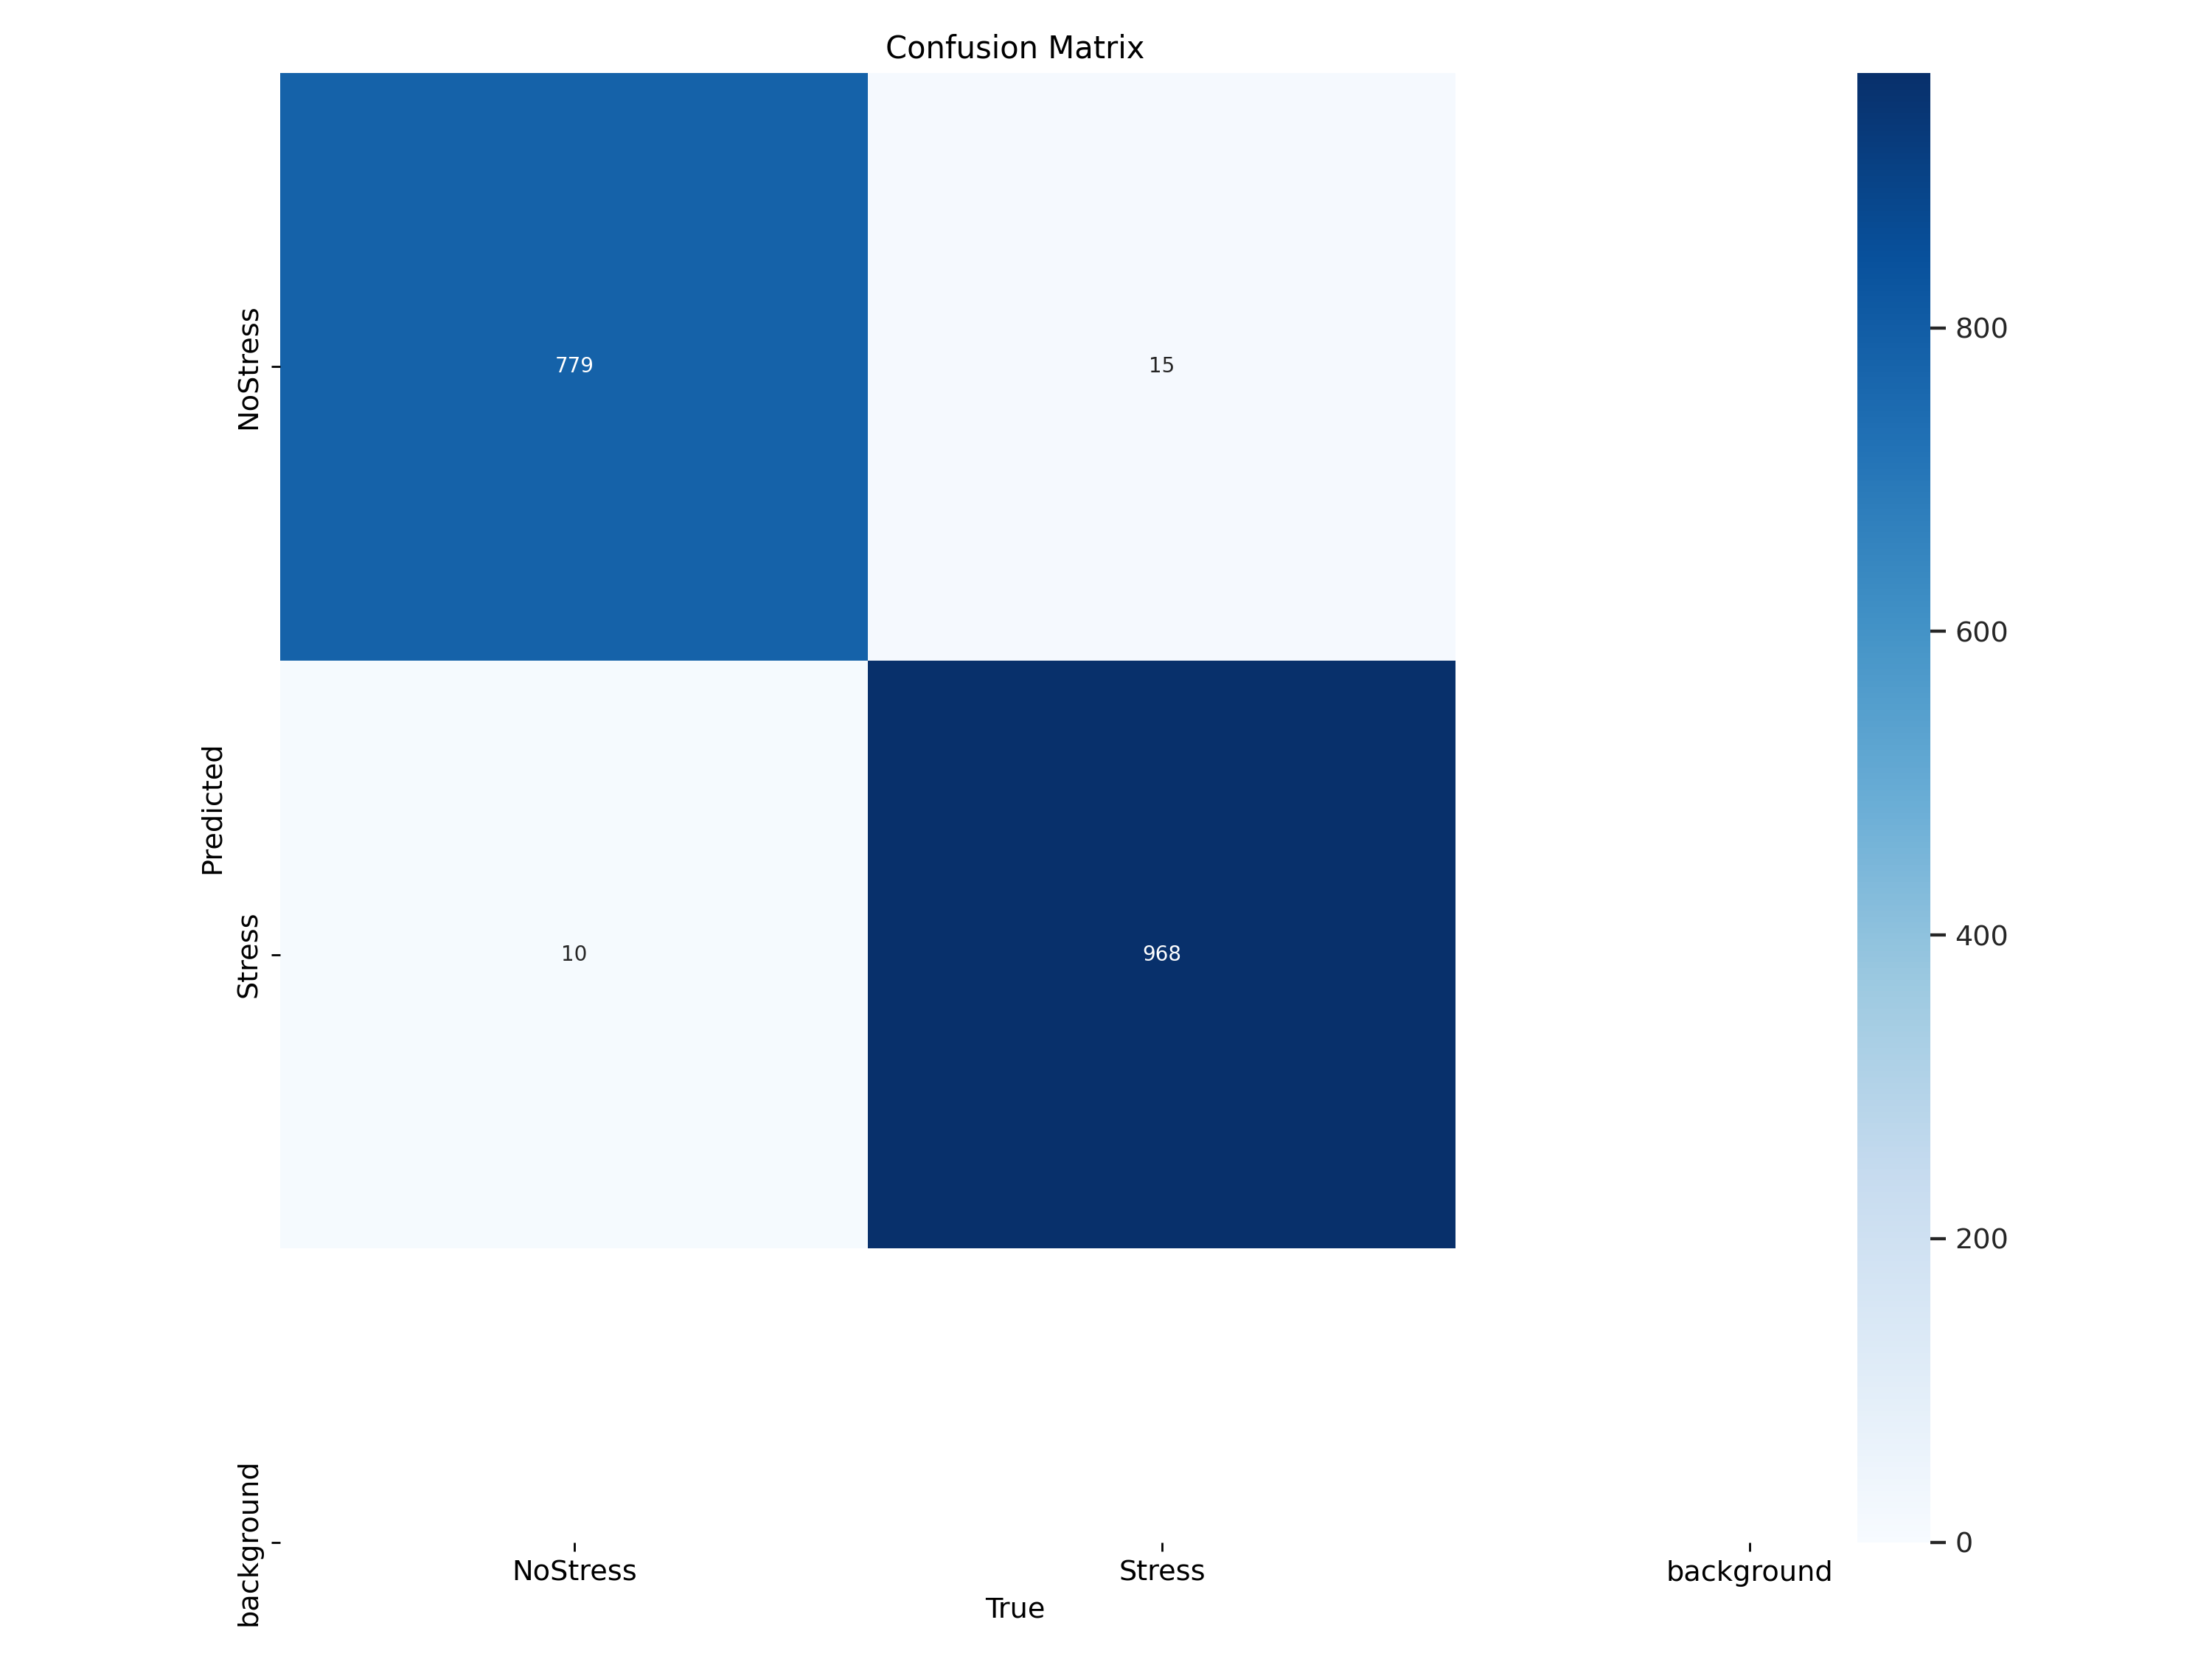

In [ ]:
Image.open("/content/runs/classify/train3/confusion_matrix.png")

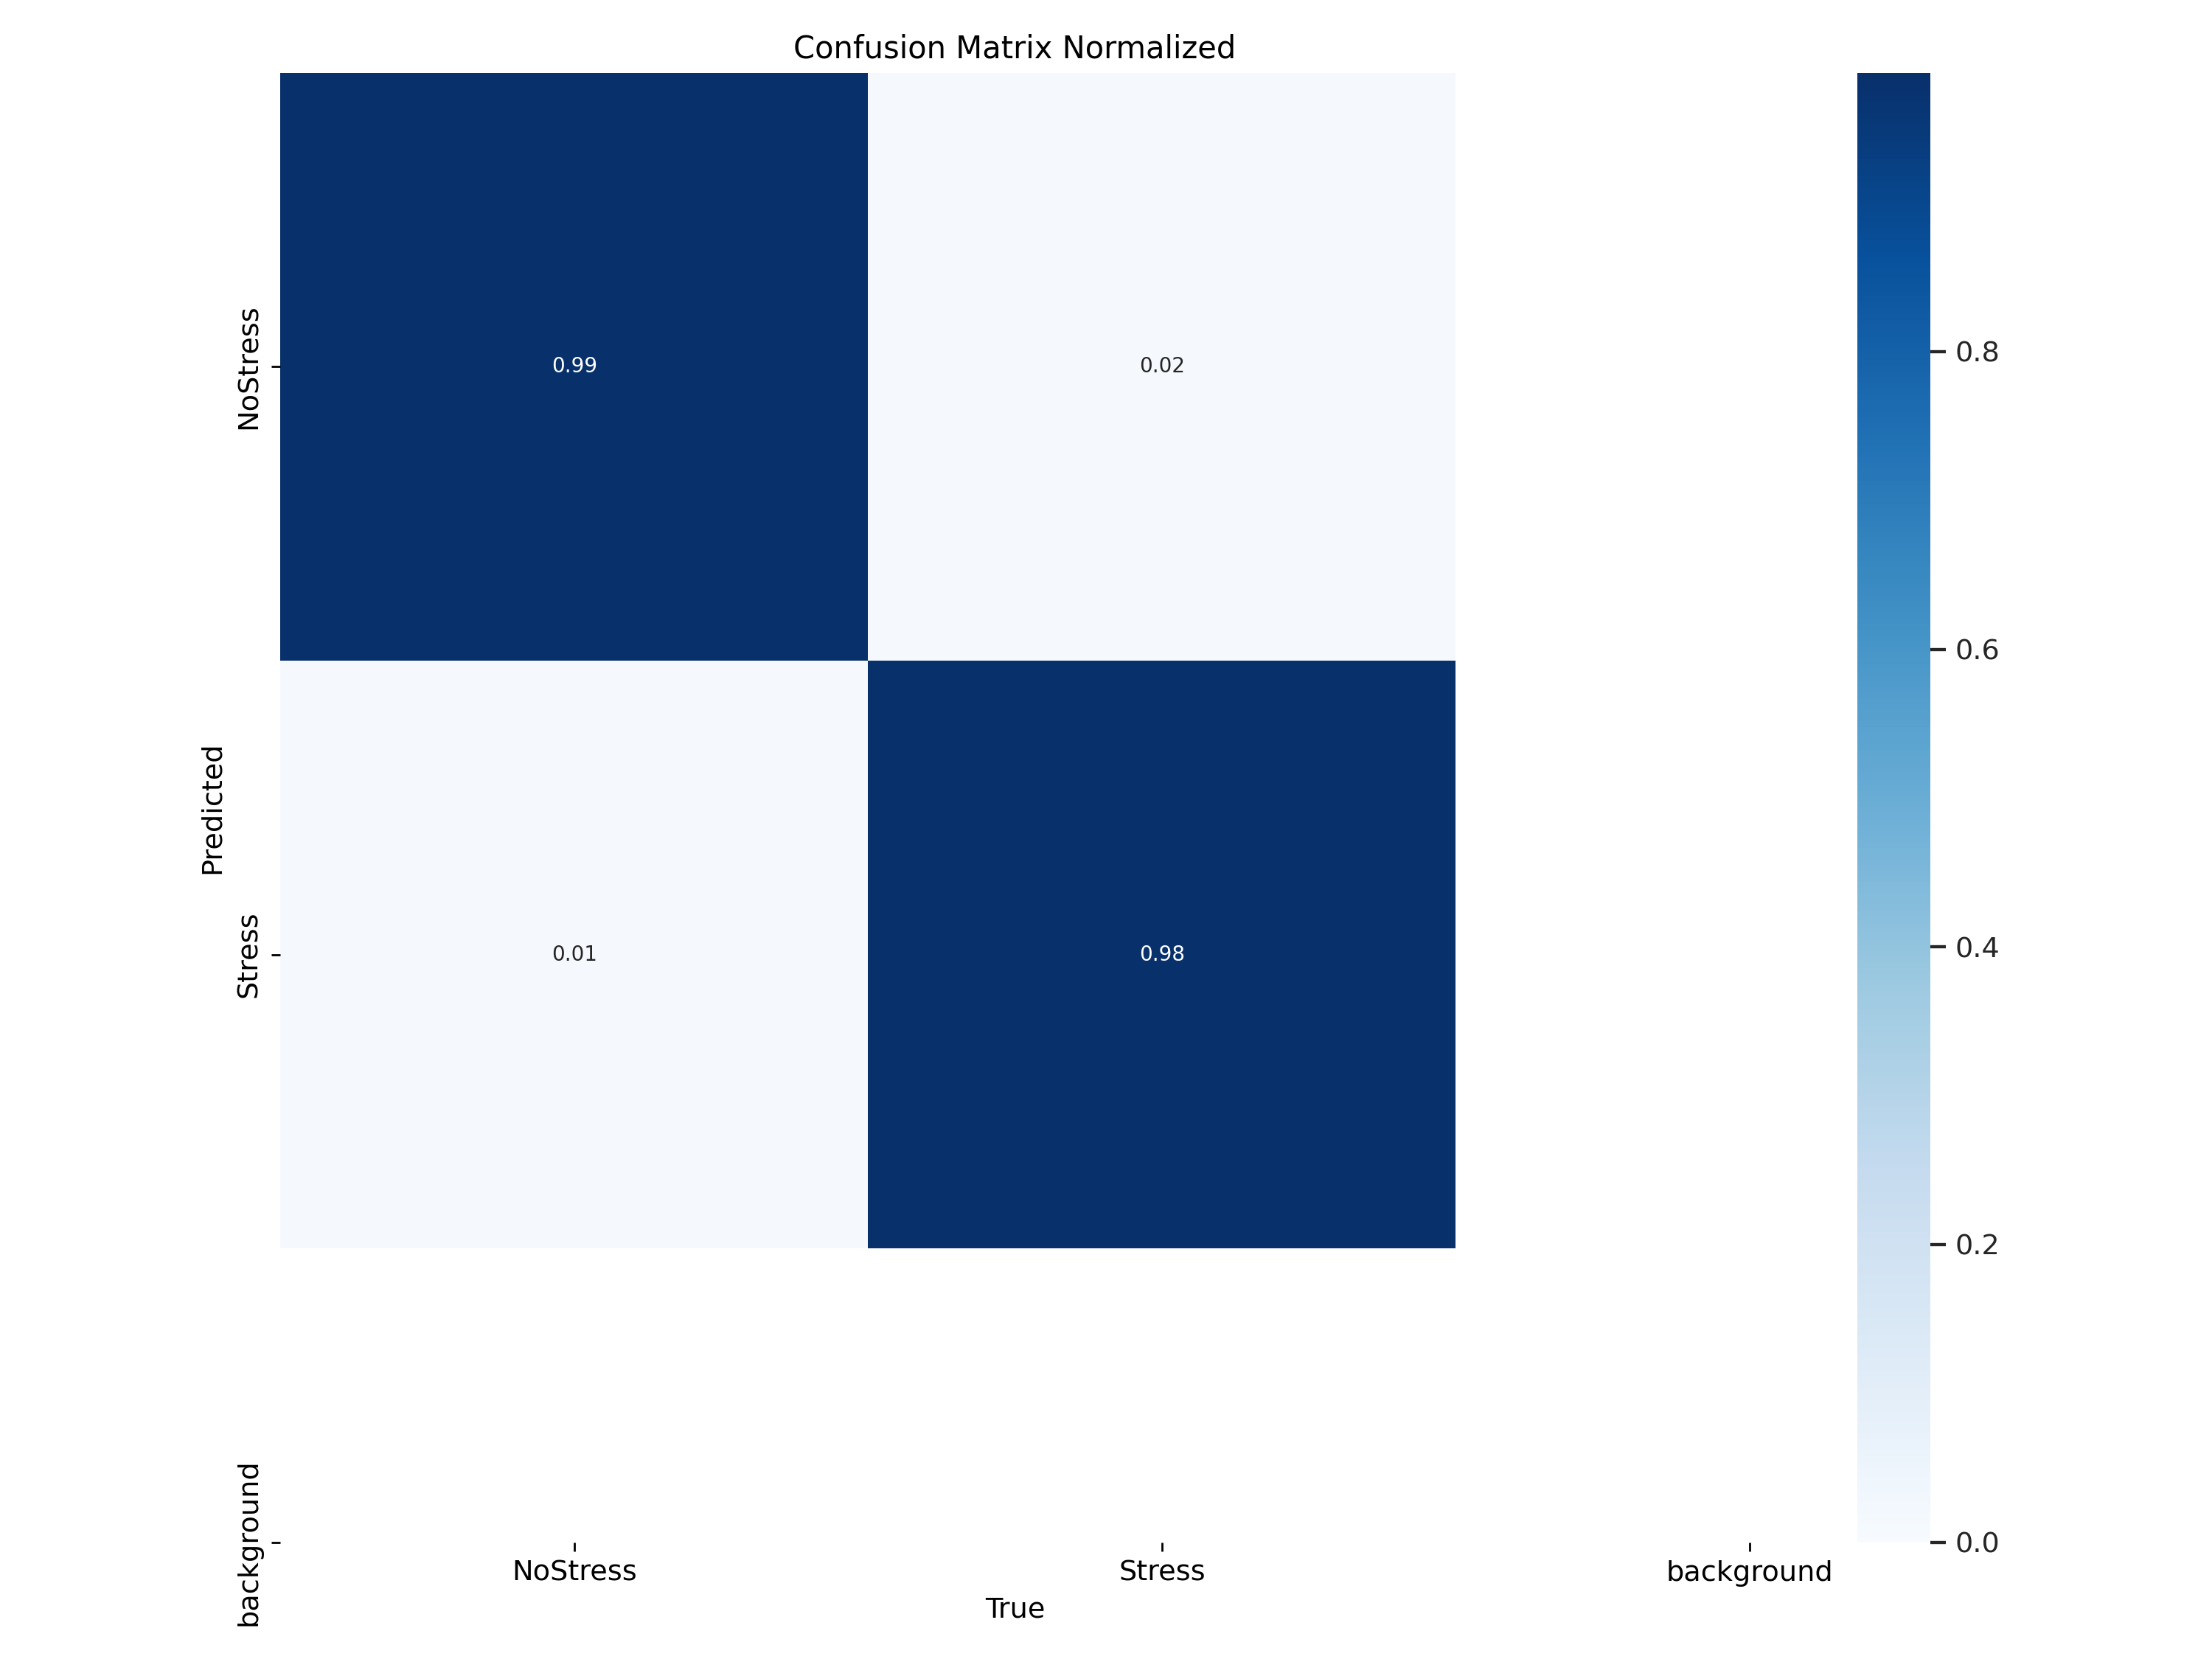

In [ ]:
Image.open("/content/runs/classify/train3/confusion_matrix_normalized.png")

In [ ]:
# Perform inference on a new image
img_path = '/content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/test/NoStress/AF04HAS_updated.JPG'  # Replace with the path to your image
results = model(img_path)

# Display results
print(results)



WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
image 1/1 /content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF/test/NoStress/AF04HAS_updated.JPG: 224x224 NoStress 1.00, Stress 0.00, 5.8ms
Speed: 7.5ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'NoStress', 1: 'Stress'}
obb: None
orig_img: array([[[160, 190, 217],
        [161, 191, 218],
        [163, 193, 220],
        ...,
        [167, 197, 224],
        [163, 191, 221],
        [163, 191, 221]],

       [[164, 194, 221],
        [165, 195, 222],
        [167, 197, 224],
        ...,
        [166, 196, 223],
        [159, 189, 218],
        [159, 189, 218]],

       [[165, 195, 222],
        [167, 197, 224],
        [169, 199, 226],
        ...,
        [170, 200, 227],
        [165, 195, 224],
        [163, 194, 

In [ ]:
model.export(format="torchscript")  # Saves for PyTorch inference
model.export(format="onnx")  # Convert to ONNX for deployment


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/classify/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 2) (9.8 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 1.1s, saved as 'runs/classify/train/weights/best.torchscript' (19.5 MB)

Export complete (2.7s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=runs/classify/train/weights/best.torchscript imgsz=224  
Validate:        yolo val task=classify model=runs/classify/train/weights/best.torchscript imgsz=224 data=/content/drive/MyDrive/Datasets/stress_nonstress/KDEF/KDEF  
Visualize:       https://netron.app
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/classify/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 2) (9.8 MB)
requirements: Ultralyt

'runs/classify/train/weights/best.onnx'

#Resnet18 Model

In [ ]:



# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to train and validate the model
def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, epochs=25, device=None):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            # Convert logits to probabilities for binary classification
            outputs = torch.sigmoid(outputs).squeeze()  # Apply sigmoid to convert to [0, 1]

            # Calculate the loss
            loss = criterion(outputs, labels.float())  # BCEWithLogitsLoss already handles sigmoid, remove .sigmoid() if used
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            # Convert to binary predictions
            preds = (outputs > 0.5).float()  # Threshold at 0.5 for binary classification
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        # Epoch Loss and Accuracy
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                outputs = torch.sigmoid(outputs).squeeze()  # Apply sigmoid to convert to [0, 1]

                # Calculate the loss
                loss = criterion(outputs, labels.float())
                running_loss += loss.item() * inputs.size(0)

                # Convert to binary predictions
                preds = (outputs > 0.5).float()
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Validation Loss and Accuracy
        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # Save the best model based on validation accuracy
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = model.state_dict()

        # Confusion Matrix and Classification Report every 5 epochs
        if epoch % 5 == 0:  # Display confusion matrix every 5 epochs
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[0, 1])

            # Display classification report
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [ ]:

# Function to test the model
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            # Apply sigmoid to get probabilities for binary classification
            outputs = torch.sigmoid(outputs).squeeze()  # Apply sigmoid to convert to [0, 1]

            # Convert to binary predictions (1 if probability > 0.5 else 0)
            preds = (outputs > 0.5).float()

            all_preds.extend(preds.cpu().numpy())  # Store the predicted labels
            all_labels.extend(labels.cpu().numpy())  # Store the true labels

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    # Print the classification report
    print('Classification Report:\n', classification_report(all_labels, all_preds))

    # Plot confusion matrix
    plot_confusion_matrix(cm,classes=[0, 1])



In [ ]:

# Load ResNet18 Model for Transfer Learning
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to suit binary classification
model.fc = nn.Linear(model.fc.in_features, 1)  # For binary classification (1 output unit)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss works directly with logits
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.4, patience=2, verbose=True)

# Freezing earlier layers (optional for transfer learning)
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final fully connected layer for fine-tuning
for param in model.fc.parameters():
    param.requires_grad = True




Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]


Epoch 1/25
----------
Training Loss: 0.6777, Accuracy: 0.5214
Validation Loss: 0.6553, Accuracy: 0.6366


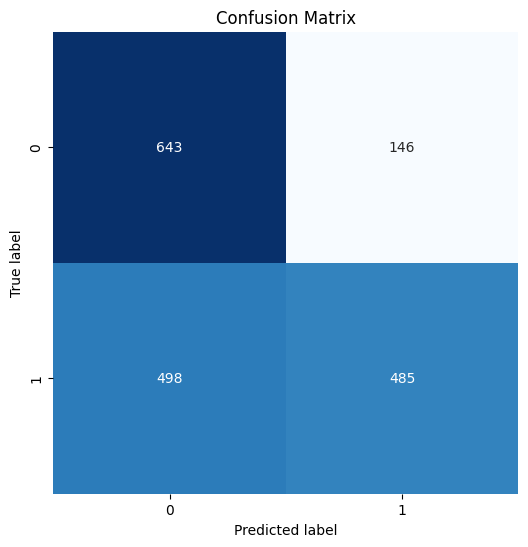

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.81      0.67       789
           1       0.77      0.49      0.60       983

    accuracy                           0.64      1772
   macro avg       0.67      0.65      0.63      1772
weighted avg       0.68      0.64      0.63      1772

Epoch 2/25
----------
Training Loss: 0.6491, Accuracy: 0.6355
Validation Loss: 0.6424, Accuracy: 0.5858
Epoch 3/25
----------
Training Loss: 0.6361, Accuracy: 0.7022
Validation Loss: 0.6301, Accuracy: 0.7235
Epoch 4/25
----------
Training Loss: 0.6319, Accuracy: 0.7206
Validation Loss: 0.6252, Accuracy: 0.7421
Epoch 5/25
----------
Training Loss: 0.6264, Accuracy: 0.7321
Validation Loss: 0.6218, Accuracy: 0.7207
Epoch 6/25
----------
Training Loss: 0.6226, Accuracy: 0.7410


In [ ]:

# Train the model
trained_model = train_and_validate(
    model,
    train_loader=train_loader,
    valid_loader=val_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    criterion=criterion,
    epochs=25,
    device=device
)


In [ ]:
# Test the model
test_model(trained_model, test_loader, device)